In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Start with a simple 7 x 7 test input

topography = np.array([[1,1,0,-1,1,1,1],
                         [1,1,2,3,4,3,1],
                         [2,3,1,0,3,4,3],
                         [1,0,1,1,3,2,3],
                         [0,-1,-2,1,3,3,2],
                         [2,3,-1,1,3,0,-1],
                         [2,3,0,1,3,-1,0]])


In [26]:
def apply_sea_level(sealevel: int, topography: np.ndarray) -> np.ndarray:
    '''function returns coordinates that would be below the sea level as 1
    and anything above as 0'''
    
    #simple thresholding
    boolean_topography = topography < sealevel

    return boolean_topography

def find_underwater_states(thresholded_topography: np.ndarray) -> np.ndarray:
    '''Function performs connected components analysis to find the different 
    bodies in the topography. It then analyses whether the body is connected to
    the border. It returns an array of land elevations normalised to the set 
    sea level.'''
    x,y = thresholded_topography.shape
    connected_topography = np.zeros([x,y])
    
    blob_count = 0
    total_neighbours = 9
    neighbour_count = 0
    error_count = 0
    #iterate through the thresholded topography and populate the connected one
    neighbouring_indices = [-1,0,1]
    for i in range(x - 1):
        for j in range(y - 1):
            neighbour_count = 0
            try:
                if thresholded_topography[i,j] == True:
                    #if state is underwater, check neigbours
                   
                    for dx in neighbouring_indices:
                        for dy in neighbouring_indices:
                            #if neighbour is already assigned a blob, assign 
                            #current state to the same blob
                            if connected_topography[i + dx,j + dy] > 0:
                                connected_topography[i,j] = \
                                    connected_topography[i + dx,j + dy]    
                            else:
                                neighbour_count += 1

            # #catch exceptions to do with index errors 
            except IndexError as e:
                continue
                
            #if no neighbours were found
            if neighbour_count == total_neighbours:
                blob_count += 1
                connected_topography[i,j] = blob_count




    return connected_topography
    

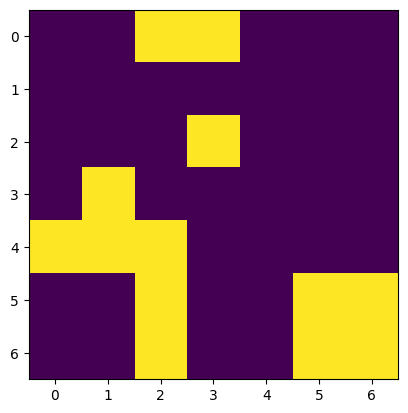

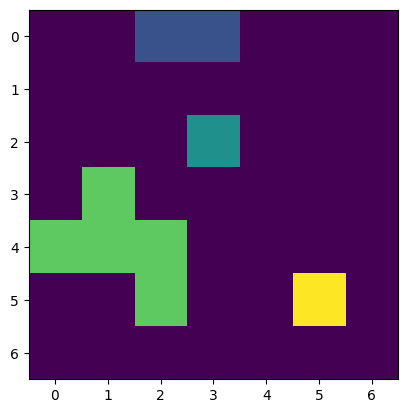

In [31]:
#define variable for sealevel
sealevel = 1

new_topography = apply_sea_level(sealevel, topography)
plt.imshow(new_topography)
connected = find_underwater_states(new_topography)
plt.figure()
plt.imshow(connected)
